In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dftotal = pd.read_csv('/content/sample_data/data.csv')
dftotal.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [6]:
dftotal.columns


Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [7]:
temp = dftotal['label'].unique()
print(temp)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [8]:
dftotal = dftotal.drop('filename', axis=1)
dftotal.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [9]:
print(dftotal.shape)
for col in dftotal.columns:
  if dftotal[col].isnull().any():
    mean = dftotal[col].mean()
    dftotal[col].fillna(mean, inplace=True)

(1000, 29)


In [10]:
dftotal = dftotal.sample(frac=1).reset_index(drop=True)
dftotal.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,64.599609,28,0.274738,0.090319,1552.625942,1848.605499,3166.755851,0.059249,-204.688462,121.929365,...,1.201496,-6.209929,-1.682199,-8.695933,-2.513680,-11.334352,0.168871,-7.287177,-7.504440,country
1,117.453835,58,0.456040,0.097612,2269.141394,1928.799479,4186.416352,0.137381,-100.400221,104.691589,...,9.963104,-14.849633,0.346066,-7.327095,6.979448,-12.664924,-0.557887,-11.755469,-1.539930,metal
2,92.285156,45,0.383343,0.222205,2345.907602,2378.402042,4735.838030,0.115493,-26.384333,85.787988,...,5.429830,-0.947817,0.489491,-1.523222,-2.460434,-5.874004,-1.548140,-6.820893,-1.388706,rock
3,135.999178,63,0.468550,0.172631,3079.417935,2709.948555,6405.686266,0.154307,-108.486479,69.932077,...,17.998258,-9.041119,6.993581,-4.731979,2.356368,0.197957,2.346082,-0.787207,-0.594296,disco
4,135.999178,62,0.328119,0.022799,1266.405832,1691.422950,2410.418758,0.059278,-345.733189,146.985042,...,1.222566,-1.942653,-5.551130,-4.402624,-2.604506,-5.194559,-5.416318,-3.122155,-0.792372,jazz


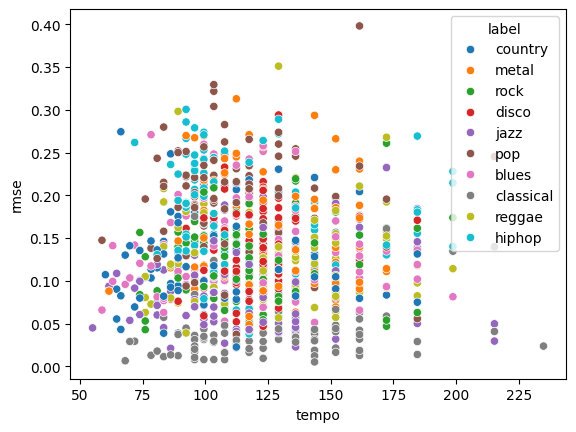

In [11]:
sns.scatterplot(x='tempo', y='rmse', hue='label', data=dftotal)
plt.show()

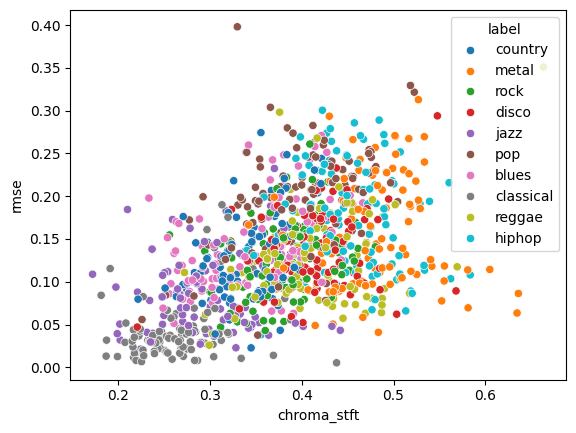

In [12]:
sns.scatterplot(x='chroma_stft', y='rmse', hue='label', data=dftotal)
plt.show()

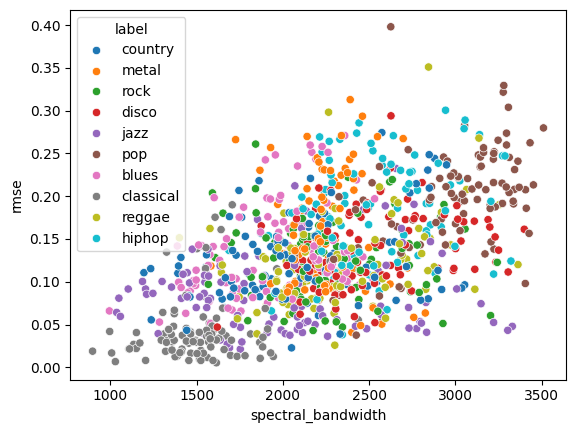

In [13]:
sns.scatterplot(x='spectral_bandwidth', y='rmse', hue='label', data=dftotal)
plt.show()

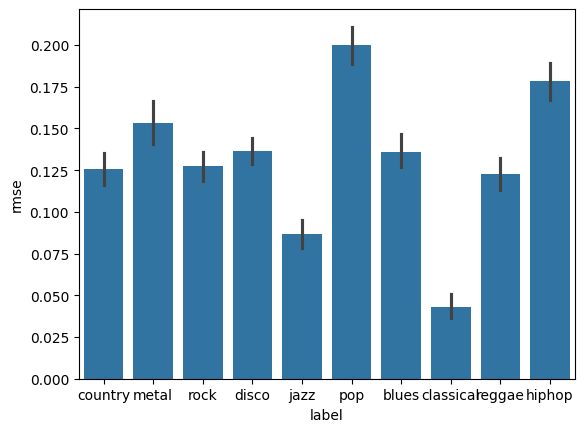

In [14]:
sns.barplot(x='label', y='rmse', data=dftotal)
plt.show()

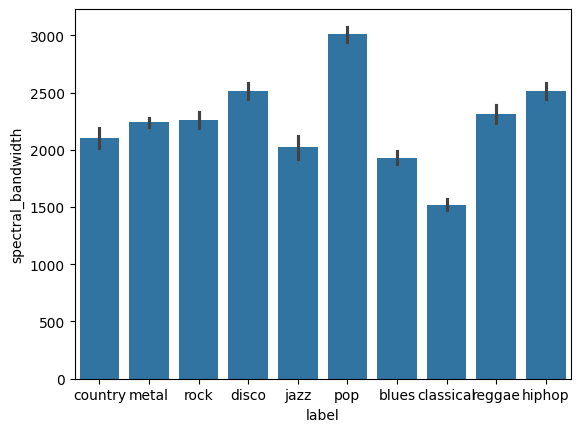

In [15]:
sns.barplot(x='label', y='spectral_bandwidth', data=dftotal)
plt.show()

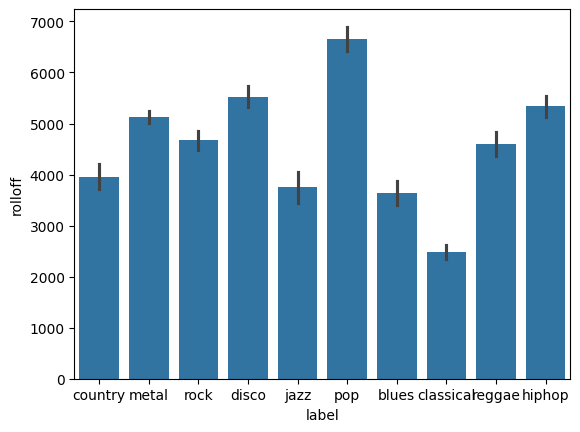

In [16]:
sns.barplot(x='label', y='rolloff', data=dftotal)
plt.show()

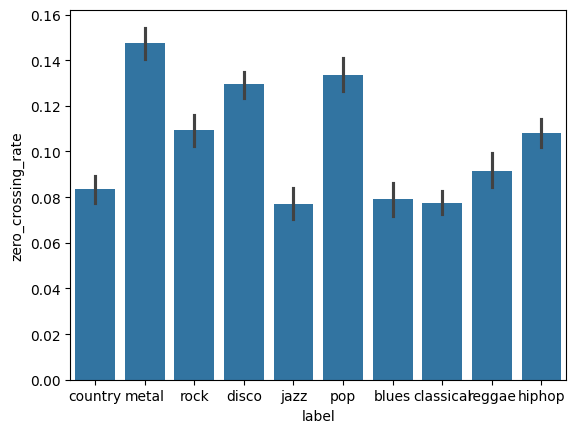

In [17]:
sns.barplot(x='label', y='zero_crossing_rate', data=dftotal)
plt.show()

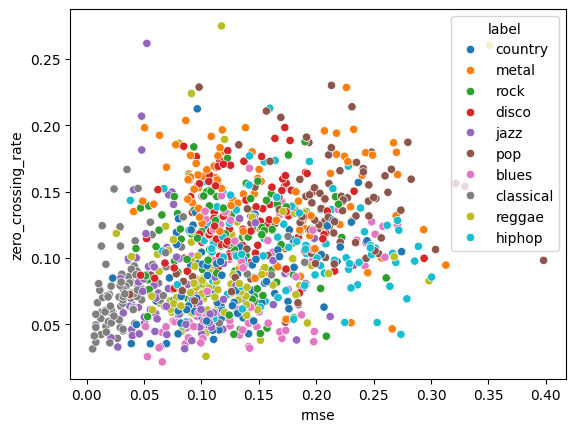

In [18]:
sns.scatterplot(x='rmse', y='zero_crossing_rate', hue='label', data=dftotal)
plt.show()

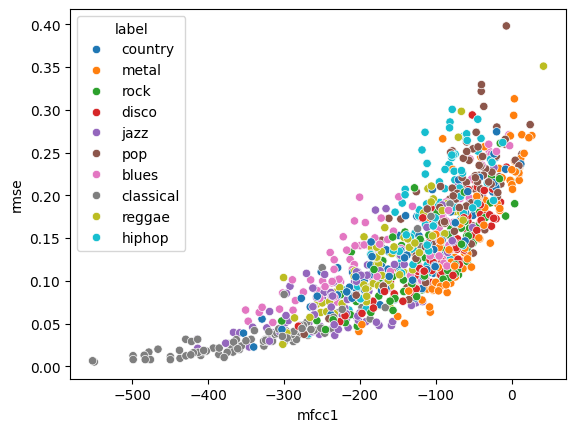

In [19]:
sns.scatterplot(x='mfcc1', y='rmse', hue='label', data=dftotal)
plt.show()

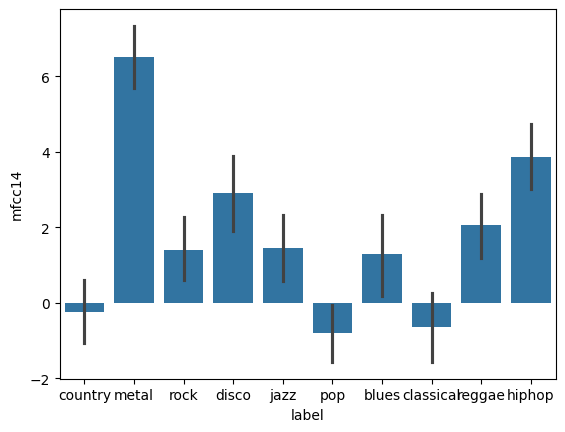

In [23]:
sns.barplot(x='label', y='mfcc14', data=dftotal)
plt.show()

In [25]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
dfscaled = scaler.fit_transform(dftotal.drop('label', axis=1))
dfscaled = pd.DataFrame(dfscaled, columns=dftotal.columns[:-1])
dfscaled['label'] = dftotal['label']
dfscaled.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.053472,0.101010,0.209349,0.216542,0.254287,0.363998,0.304982,0.148339,0.584710,0.634335,...,0.437835,0.525472,0.354890,0.295941,0.451949,0.205218,0.443962,0.337952,0.352105,country
1,0.347222,0.404040,0.578007,0.235111,0.439696,0.394705,0.433607,0.457003,0.760251,0.545765,...,0.663401,0.312653,0.420828,0.341717,0.777475,0.158886,0.417395,0.203329,0.521051,metal
2,0.207341,0.272727,0.430184,0.552354,0.459561,0.566862,0.502914,0.370532,0.884836,0.448636,...,0.546692,0.655091,0.425490,0.535806,0.453775,0.395357,0.381194,0.352001,0.525334,rock
3,0.450292,0.454545,0.603444,0.426127,0.649368,0.693814,0.713559,0.523871,0.746640,0.367166,...,0.870264,0.455732,0.636934,0.428501,0.618946,0.606793,0.523553,0.533787,0.547836,disco
4,0.450292,0.444444,0.317892,0.044618,0.180223,0.303811,0.209573,0.148451,0.347301,0.763074,...,0.438377,0.630586,0.229114,0.439515,0.448834,0.419016,0.239788,0.463439,0.542226,jazz


In [30]:
X = dfscaled.iloc[:, :-1]
y = dftotal.iloc[:, -1]
X.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.053472,0.101010,0.209349,0.216542,0.254287,0.363998,0.304982,0.148339,0.584710,0.634335,...,0.320536,0.437835,0.525472,0.354890,0.295941,0.451949,0.205218,0.443962,0.337952,0.352105
1,0.347222,0.404040,0.578007,0.235111,0.439696,0.394705,0.433607,0.457003,0.760251,0.545765,...,0.314199,0.663401,0.312653,0.420828,0.341717,0.777475,0.158886,0.417395,0.203329,0.521051
2,0.207341,0.272727,0.430184,0.552354,0.459561,0.566862,0.502914,0.370532,0.884836,0.448636,...,0.626212,0.546692,0.655091,0.425490,0.535806,0.453775,0.395357,0.381194,0.352001,0.525334
3,0.450292,0.454545,0.603444,0.426127,0.649368,0.693814,0.713559,0.523871,0.746640,0.367166,...,0.350216,0.870264,0.455732,0.636934,0.428501,0.618946,0.606793,0.523553,0.533787,0.547836
4,0.450292,0.444444,0.317892,0.044618,0.180223,0.303811,0.209573,0.148451,0.347301,0.763074,...,0.639546,0.438377,0.630586,0.229114,0.439515,0.448834,0.419016,0.239788,0.463439,0.542226


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.67      0.75      0.71        24
   classical       0.84      0.95      0.89        43
     country       0.43      0.80      0.56        25
       disco       0.41      0.44      0.43        27
      hiphop       0.74      0.54      0.62        37
        jazz       0.64      0.55      0.59        29
       metal       0.85      0.71      0.77        24
         pop       0.88      0.67      0.76        42
      reggae       0.60      0.48      0.53        25
        rock       0.38      0.38      0.38        24

    accuracy                           0.64       300
   macro avg       0.64      0.63      0.62       300
weighted avg       0.67      0.64      0.65       300



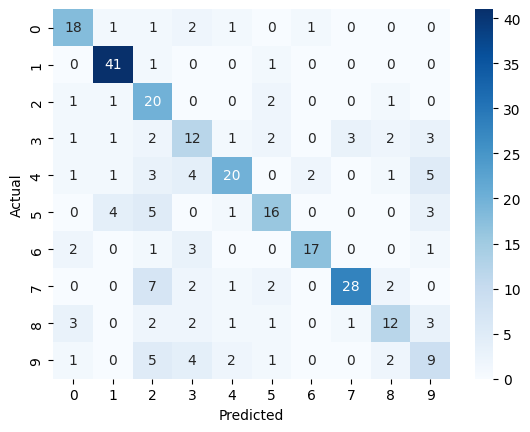

In [39]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()